In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

### Explore individual datasets

In [2]:
account = pd.read_csv('../data/account.csv',delimiter=';')
card_dev = pd.read_csv('../data/card_dev.csv',delimiter=';')
client = pd.read_csv('../data/client.csv',delimiter=';')
disp = pd.read_csv('../data/disp.csv',delimiter=';')
district = pd.read_csv('../data/district.csv',delimiter=';')
loan_dev = pd.read_csv('../data/loan_dev.csv',delimiter=';')
trans_dev = pd.read_csv('../data/trans_dev.csv',delimiter=';', dtype={'bank': str})

#### District

In [3]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   code                                               77 non-null     int64  
 1   name                                               77 non-null     object 
 2   region                                             77 non-null     object 
 3   no. of inhabitants                                 77 non-null     int64  
 4   no. of municipalities with inhabitants < 499       77 non-null     int64  
 5   no. of municipalities with inhabitants 500-1999    77 non-null     int64  
 6   no. of municipalities with inhabitants 2000-9999   77 non-null     int64  
 7   no. of municipalities with inhabitants >10000      77 non-null     int64  
 8   no. of cities                                      77 non-null     int64  
 9   ratio of urb

Text(0.5, 1.0, 'No. of committed crimes 95 96')

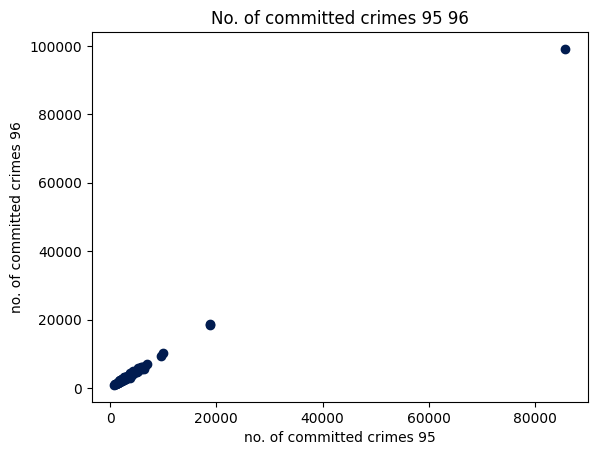

In [4]:
district['no. of commited crimes \'95 '] = pd.to_numeric(district['no. of commited crimes \'95 '], errors='coerce')
district['no. of commited crimes \'96 '] = pd.to_numeric(district['no. of commited crimes \'96 '], errors='coerce')

plt.scatter(district['no. of commited crimes \'95 '], district['no. of commited crimes \'96 '], color="#011C50")

plt.xlabel('no. of committed crimes 95')
plt.ylabel('no. of committed crimes 96')
plt.title('No. of committed crimes 95 96')

Text(0.5, 1.0, "Commited crimes '95/'96")

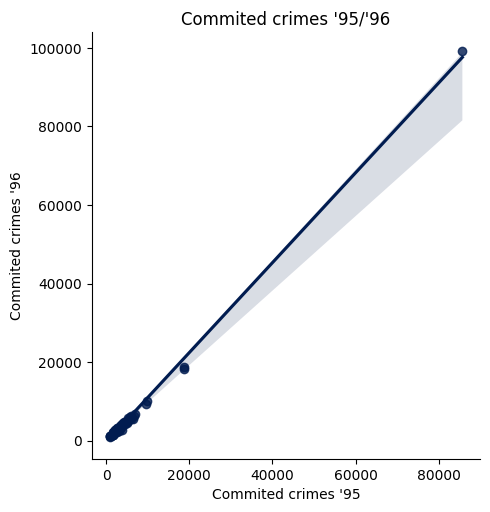

In [5]:
sns.lmplot(x="no. of commited crimes \'95 ", y="no. of commited crimes \'96 ", data=district, line_kws={'color': '#011C50'}, scatter_kws={"color": "#011C50"})

plt.xlabel('Commited crimes \'95')
plt.ylabel('Commited crimes \'96')
plt.title('Commited crimes \'95/\'96')

Text(0.5, 1.0, "Unemployment rate '95/'96")

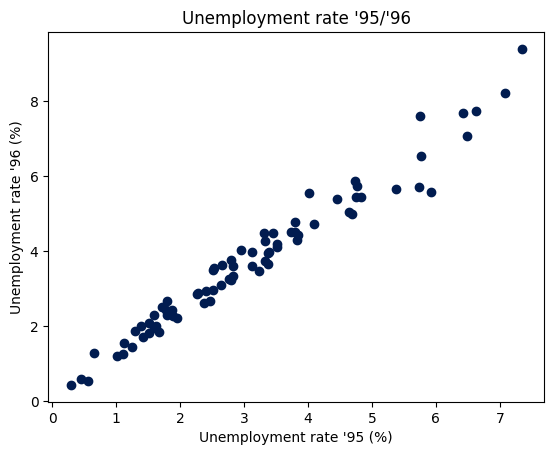

In [6]:
district['unemploymant rate \'95 '] = pd.to_numeric(district['unemploymant rate \'95 '], errors='coerce')
district['unemploymant rate \'96 '] = pd.to_numeric(district['unemploymant rate \'96 '], errors='coerce')

plt.scatter(district['unemploymant rate \'95 '], district['unemploymant rate \'96 '], color="#011C50")

plt.xlabel('Unemployment rate \'95 (%)')
plt.ylabel('Unemployment rate \'96 (%)')
plt.title('Unemployment rate \'95/\'96')

Text(0.5, 1.0, "Unemployment rate '95/'96")

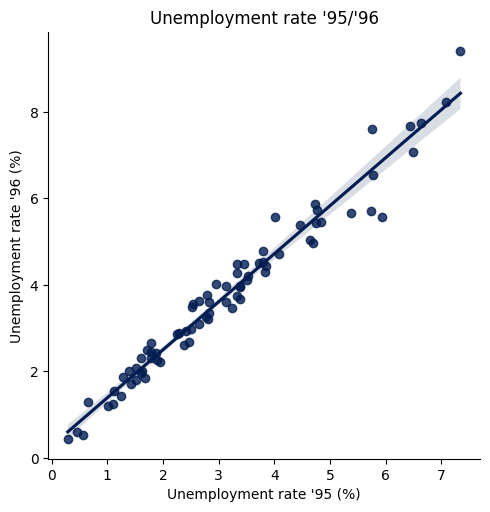

In [7]:
sns.lmplot(x="unemploymant rate \'95 ", y="unemploymant rate \'96 ", data=district, line_kws={'color': '#011C50'}, scatter_kws={"color": "#011C50"})

plt.xlabel('Unemployment rate \'95 (%)')
plt.ylabel('Unemployment rate \'96 (%)')
plt.title('Unemployment rate \'95/\'96')

#### Transactions

In [8]:
trans_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396685 entries, 0 to 396684
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    396685 non-null  int64  
 1   account_id  396685 non-null  int64  
 2   date        396685 non-null  int64  
 3   type        396685 non-null  object 
 4   operation   325924 non-null  object 
 5   amount      396685 non-null  float64
 6   balance     396685 non-null  float64
 7   k_symbol    211441 non-null  object 
 8   bank        97242 non-null   object 
 9   account     102229 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 30.3+ MB


#### Loan

In [9]:
loan_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   loan_id     328 non-null    int64
 1   account_id  328 non-null    int64
 2   date        328 non-null    int64
 3   amount      328 non-null    int64
 4   duration    328 non-null    int64
 5   payments    328 non-null    int64
 6   status      328 non-null    int64
dtypes: int64(7)
memory usage: 18.1 KB


<AxesSubplot: title={'center': 'amount'}, xlabel='status'>

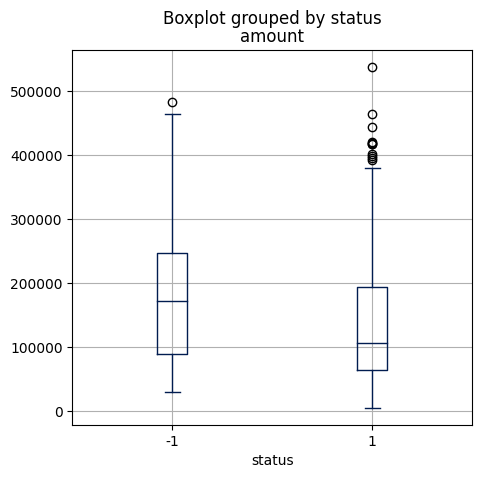

In [10]:
loan_dev.boxplot(column='amount', by='status', figsize=(5,5), color="#011C50")

#### Card

In [11]:
card_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  177 non-null    int64 
 1   disp_id  177 non-null    int64 
 2   type     177 non-null    object
 3   issued   177 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


### Explore training dataset

In [12]:
df = pd.read_csv('../data/clean/df-exploratory.csv')

Text(0.5, 1.0, 'Status count for bank loans')

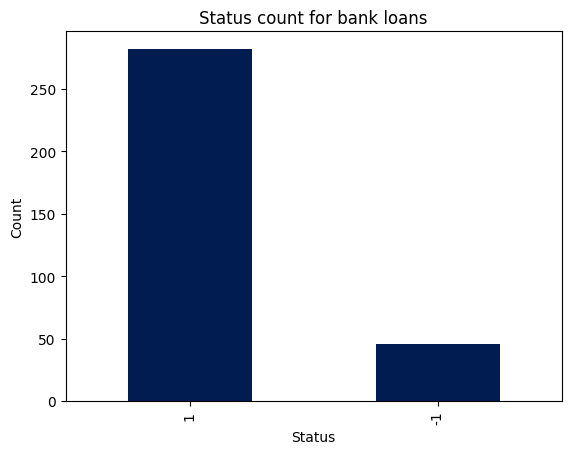

In [13]:
df['status'].value_counts().plot.bar(color="#011C50")
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status count for bank loans')

C:\Users\joaoa\AppData\Local\Temp\ipykernel_20856\2736954336.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


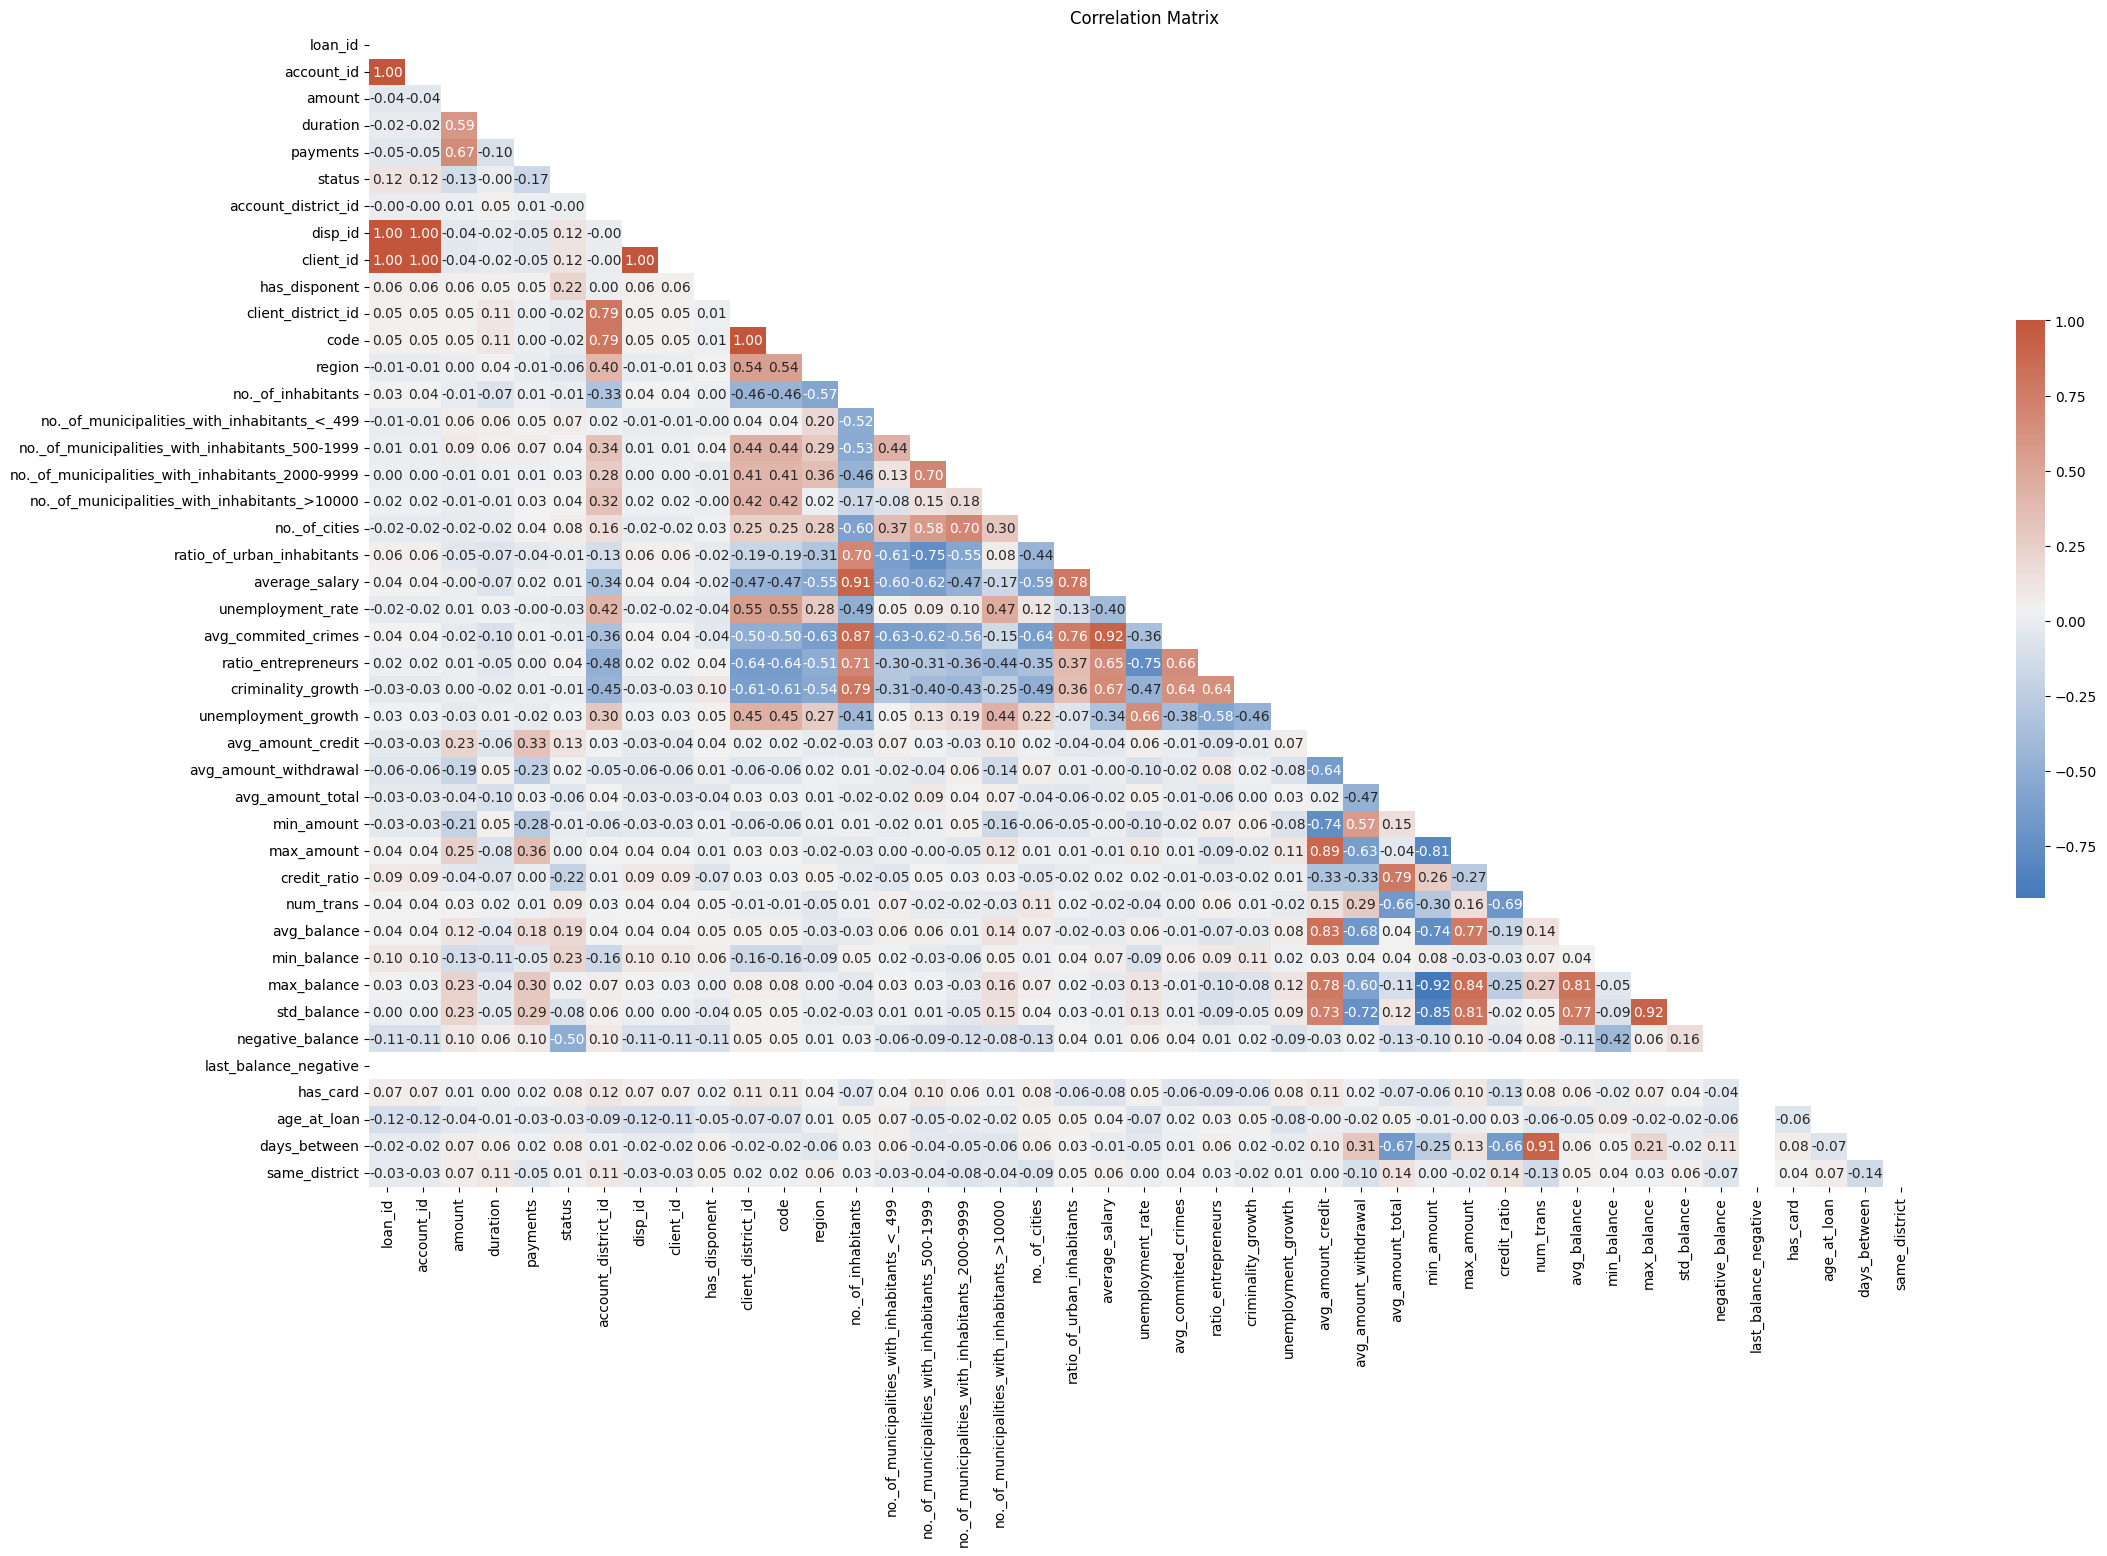

In [14]:
# correlation analysis

corr = df.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25,15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, 
    annot=True, 
    fmt='.2f',
    cbar_kws={'shrink': .5},
    mask=mask,
    cmap=colormap).set(title='Correlation Matrix')

plt.show()

In [15]:
df.columns

Index(['loan_id', 'account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'account_district_id', 'frequency', 'creation_date',
       'disp_id', 'client_id', 'has_disponent', 'client_district_id', 'gender',
       'birth_date', 'code', 'region', 'no._of_inhabitants',
       'no._of_municipalities_with_inhabitants_<_499',
       'no._of_municipalities_with_inhabitants_500-1999',
       'no._of_municipalities_with_inhabitants_2000-9999',
       'no._of_municipalities_with_inhabitants_>10000', 'no._of_cities',
       'ratio_of_urban_inhabitants', 'average_salary', 'unemployment_rate',
       'avg_commited_crimes', 'ratio_entrepreneurs', 'criminality_growth',
       'unemployment_growth', 'avg_amount_credit', 'avg_amount_withdrawal',
       'avg_amount_total', 'min_amount', 'max_amount', 'credit_ratio',
       'num_trans', 'avg_balance', 'min_balance', 'max_balance', 'std_balance',
       'negative_balance', 'last_balance_negative', 'has_card', 'age_at_loan',
       '

Text(0.5, 1.0, 'Status count by number of account disponents')

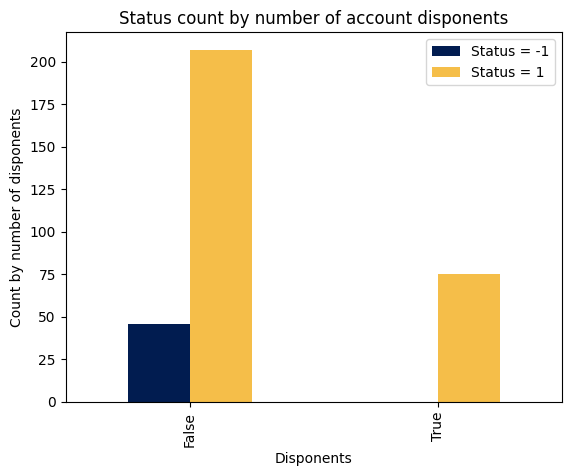

In [16]:
df.groupby('has_disponent')['status'].value_counts().unstack(1).plot.bar(color=["#011C50","#F5BE49"])

plt.xlabel('Disponents')
plt.ylabel('Count by number of disponents')
plt.legend(['Status = -1', 'Status = 1'])
plt.title('Status count by number of account disponents')

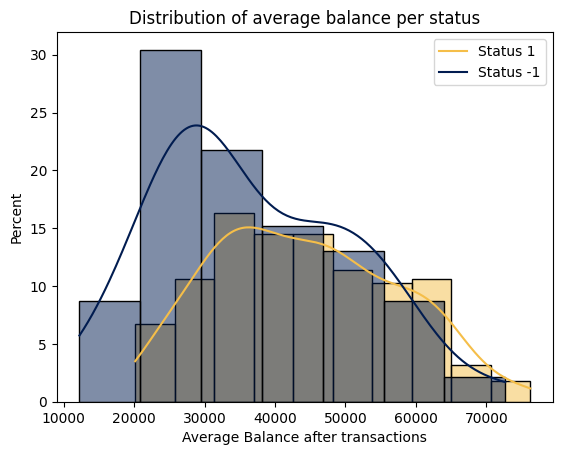

In [17]:
sns.histplot(data=df[df['status'] == 1], x='avg_balance', color="#F5BE49", stat='percent', kde=True)
sns.histplot(data=df[df['status'] == -1], x='avg_balance', color="#011C50", stat='percent', kde=True)

plt.xlabel('Average Balance after transactions')
plt.legend(['Status 1', 'Status -1'])
plt.title('Distribution of average balance per status')
plt.show()

In [34]:
fig = px.parallel_categories(df, dimensions=['gender', 'has_card', 'negative_balance', 'has_disponent', 'frequency'], color="status")

fig.layout['coloraxis']['colorbar']['x'] = 1.1
fig.show()

c:\Users\joaoa\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



C:\Users\joaoa\AppData\Local\Temp\ipykernel_20856\4101938380.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



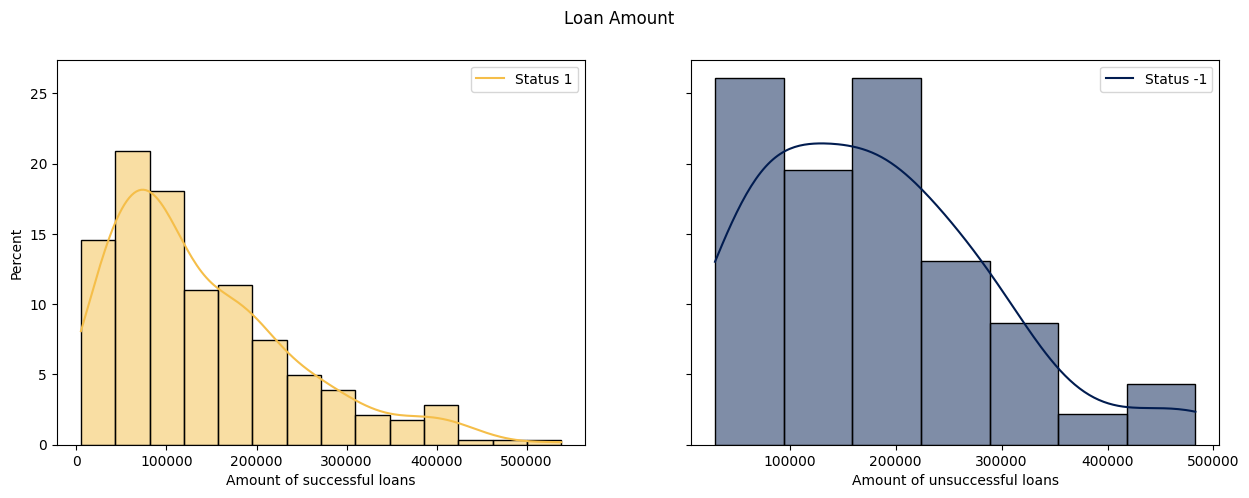

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

# commited crimes
sns.histplot(data=df[df['status'] == 1], x='amount', color="#F5BE49", kde=True, stat='percent', ax=axs[0])

# unemplyment rate
sns.histplot(data=df[df['status'] == -1], x='amount', color="#011C50", stat='percent', kde=True, ax=axs[1])

axs[0].set_xlabel('Amount of successful loans')
axs[1].set_xlabel('Amount of unsuccessful loans')
axs[0].legend(['Status 1'])
axs[1].legend(['Status -1'])

fig.suptitle('Loan Amount')
fig.show()

C:\Users\joaoa\AppData\Local\Temp\ipykernel_20856\3779889015.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



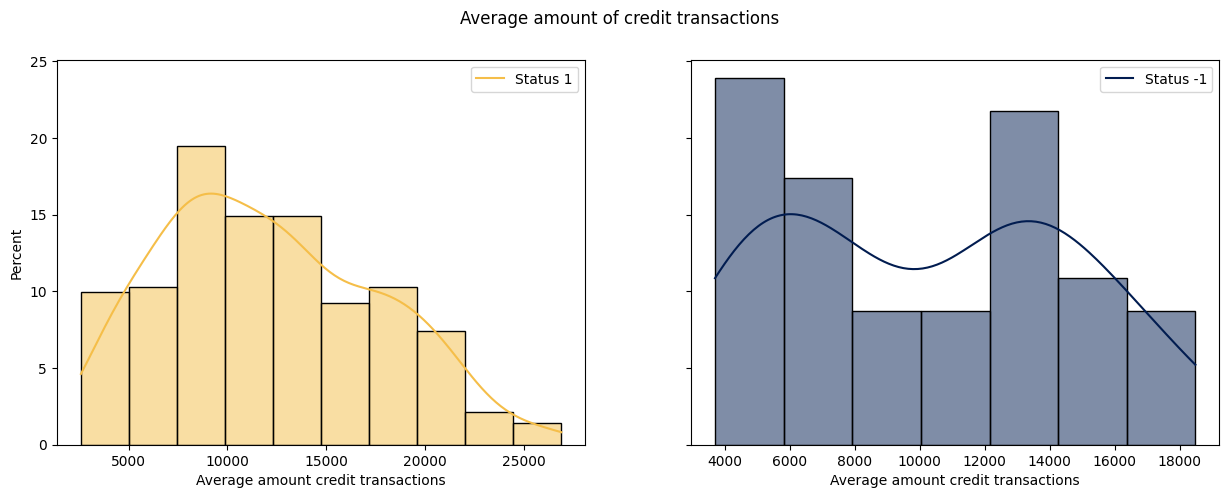

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

# commited crimes
sns.histplot(data=df[df['status'] == 1], x='avg_amount_credit', color="#F5BE49", kde=True, stat='percent', ax=axs[0])

# unemplyment rate
sns.histplot(data=df[df['status'] == -1], x='avg_amount_credit', color="#011C50", stat='percent', kde=True, ax=axs[1])

axs[0].set_xlabel('Average amount credit transactions')
axs[1].set_xlabel('Average amount credit transactions')
axs[0].legend(['Status 1'])
axs[1].legend(['Status -1'])

fig.suptitle('Average amount of credit transactions')
fig.show()

C:\Users\joaoa\AppData\Local\Temp\ipykernel_20856\3242048216.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



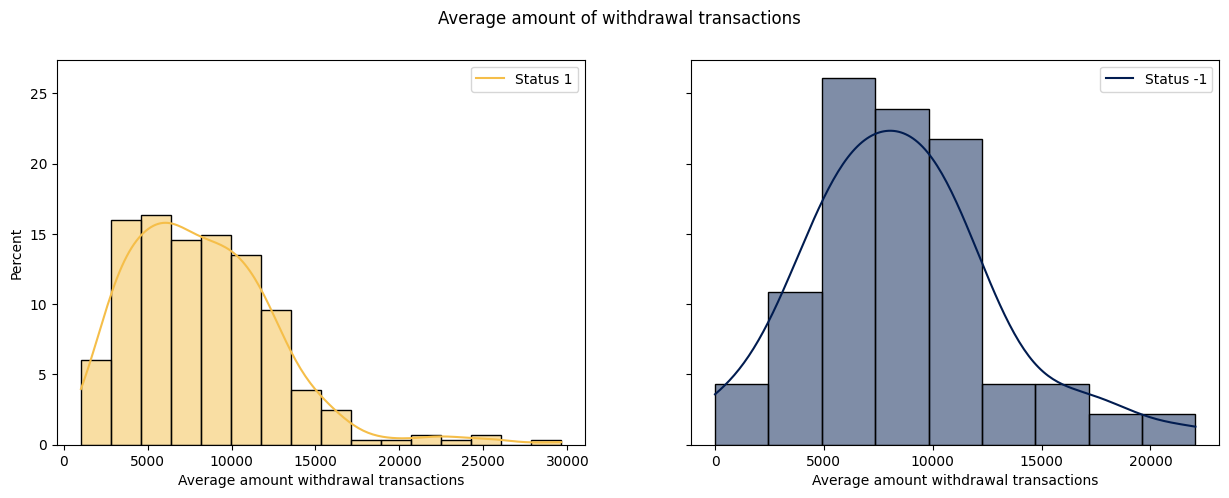

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df['avg_amount_withdrawal'] = df['avg_amount_withdrawal'] * -1
# commited crimes
sns.histplot(data=df[df['status'] == 1], x='avg_amount_withdrawal', color="#F5BE49", kde=True, stat='percent', ax=axs[0])

# unemplyment rate
sns.histplot(data=df[df['status'] == -1], x='avg_amount_withdrawal', color="#011C50", stat='percent', kde=True, ax=axs[1])

axs[0].set_xlabel('Average amount withdrawal transactions')
axs[1].set_xlabel('Average amount withdrawal transactions')
axs[0].legend(['Status 1'])
axs[1].legend(['Status -1'])

fig.suptitle('Average amount of withdrawal transactions')
fig.show()

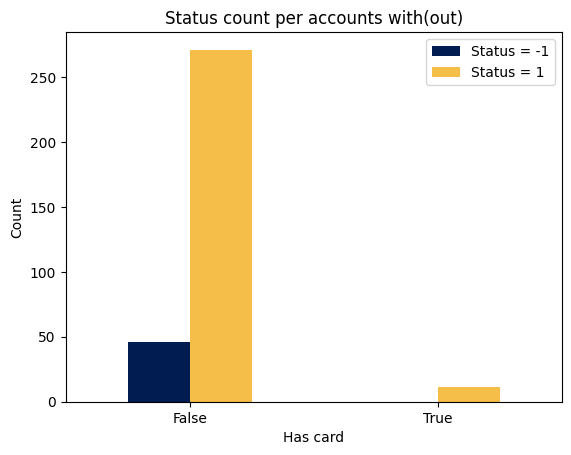

In [22]:
df["has_card"] = df["has_card"].astype(bool)
df.groupby('has_card')['status'].value_counts().unstack(1).plot.bar(color=["#011C50","#F5BE49"])
plt.ylabel('Count')
plt.xlabel('Has card')
plt.legend(['Status = -1', 'Status = 1'])
plt.title('Status count per accounts with(out)')
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Negative balance by number of accounts')

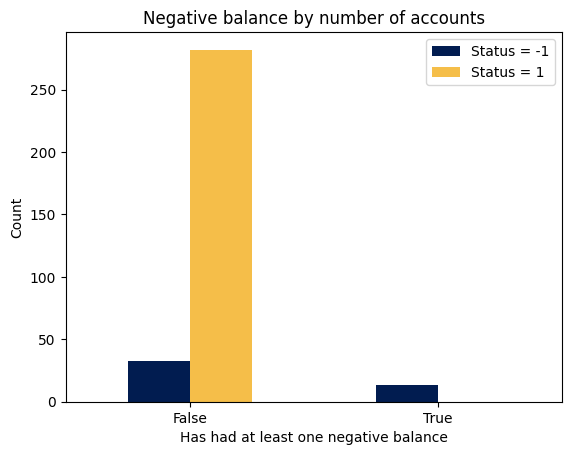

In [23]:

df["negative_balance"] = df["negative_balance"].astype(bool)
df.groupby('negative_balance')['status'].value_counts().unstack(1).plot.bar(color=["#011C50","#F5BE49"])

plt.xlabel('Has had at least one negative balance')
plt.ylabel('Count')
plt.legend(['Status = -1', 'Status = 1'])
plt.xticks(rotation=0)
plt.title('Negative balance by number of accounts')

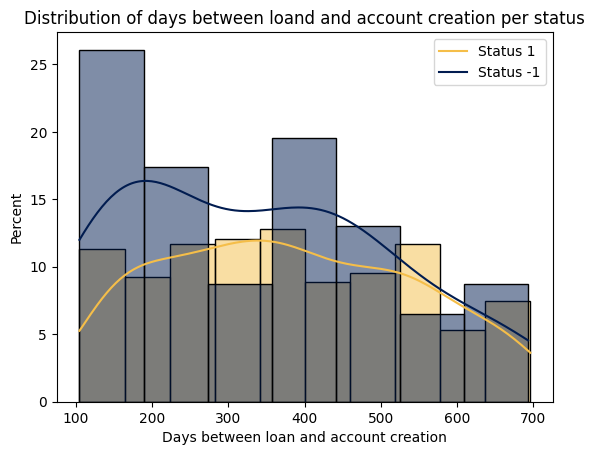

In [24]:
sns.histplot(data=df[df['status'] == 1], x='days_between', color="#F5BE49", stat='percent', kde=True)
sns.histplot(data=df[df['status'] == -1], x='days_between', color="#011C50", stat='percent', kde=True)

plt.xlabel('Days between loan and account creation')
plt.legend(['Status 1', 'Status -1'])
plt.title('Distribution of days between loand and account creation per status')
plt.show()

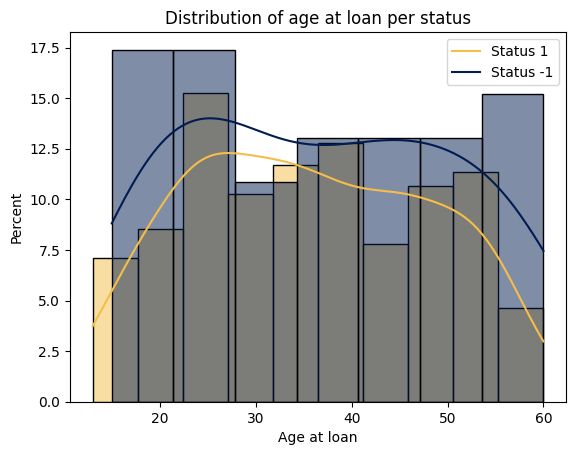

In [25]:
sns.histplot(data=df[df['status'] == 1], x='age_at_loan', color="#F5BE49", stat='percent', kde=True)
sns.histplot(data=df[df['status'] == -1], x='age_at_loan', color="#011C50", stat='percent', kde=True)

plt.xlabel('Age at loan')
plt.legend(['Status 1', 'Status -1'])
plt.title('Distribution of age at loan per status')
plt.show()

Text(0.5, 1.0, "Relation between a district's salary and commited crimes")

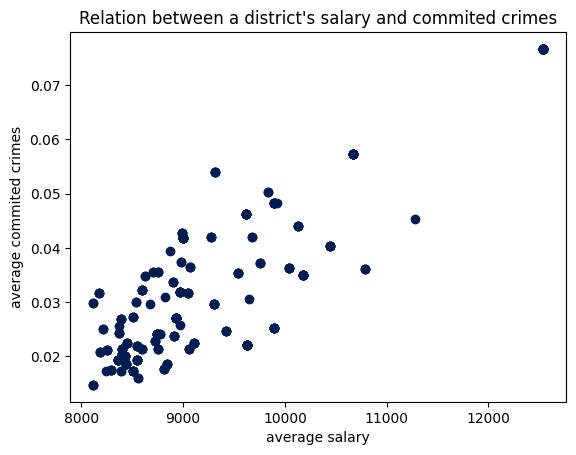

In [26]:
plt.scatter(df['average_salary'], df['avg_commited_crimes'], color="#011C50")

plt.xlabel('average salary')
plt.ylabel('average commited crimes')
plt.title('Relation between a district\'s salary and commited crimes')

In [27]:
df.columns

Index(['loan_id', 'account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'account_district_id', 'frequency', 'creation_date',
       'disp_id', 'client_id', 'has_disponent', 'client_district_id', 'gender',
       'birth_date', 'code', 'region', 'no._of_inhabitants',
       'no._of_municipalities_with_inhabitants_<_499',
       'no._of_municipalities_with_inhabitants_500-1999',
       'no._of_municipalities_with_inhabitants_2000-9999',
       'no._of_municipalities_with_inhabitants_>10000', 'no._of_cities',
       'ratio_of_urban_inhabitants', 'average_salary', 'unemployment_rate',
       'avg_commited_crimes', 'ratio_entrepreneurs', 'criminality_growth',
       'unemployment_growth', 'avg_amount_credit', 'avg_amount_withdrawal',
       'avg_amount_total', 'min_amount', 'max_amount', 'credit_ratio',
       'num_trans', 'avg_balance', 'min_balance', 'max_balance', 'std_balance',
       'negative_balance', 'last_balance_negative', 'has_card', 'age_at_loan',
       '